In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("./data/adult.csv")

In [3]:
#Basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.drop_duplicates(inplace=True)



In [5]:
#by looking basic info of data set 

In [6]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country'])

In [7]:
# Split the data into input features (x) and target variable (y)
x = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values

In [8]:
#label encoding for the target variable
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [11]:
# Scale the input features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [12]:
#create ANN MODEL
from tensorflow.keras.models import Sequential
model = Sequential()

In [13]:
#add dence 
from tensorflow.keras.layers import Dense
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
model_data=model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test, Y_test))

Epoch 1/10
814/814 [==============================] - 5s 4ms/step - loss: 0.3543 - accuracy: 0.8334 - val_loss: 0.3340 - val_accuracy: 0.8414
Epoch 2/10
814/814 [==============================] - 3s 3ms/step - loss: 0.3165 - accuracy: 0.8515 - val_loss: 0.3327 - val_accuracy: 0.8374
Epoch 3/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3070 - accuracy: 0.8568 - val_loss: 0.3256 - val_accuracy: 0.8454
Epoch 4/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3015 - accuracy: 0.8585 - val_loss: 0.3229 - val_accuracy: 0.8514
Epoch 5/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2959 - accuracy: 0.8616 - val_loss: 0.3241 - val_accuracy: 0.8474
Epoch 6/10
814/814 [==============================] - 2s 3ms/step - loss: 0.2915 - accuracy: 0.8650 - val_loss: 0.3232 - val_accuracy: 0.8497
Epoch 7/10
814/814 [==============================] - 3s 3ms/step - loss: 0.2872 - accuracy: 0.8680 - val_loss: 0.3283 - val_accuracy: 0.8450
Epoch 

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

204/204 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8420
Test Loss: 0.34020811319351196
Test Accuracy: 0.8420405387878418


In [17]:
# our model has 84% Accuracy
#lets draw graph 
import matplotlib.pyplot as plt

In [18]:
train_acc = model_data.history['accuracy']
val_acc = model_data.history['val_accuracy']
train_loss = model_data.history['loss']
val_loss = model_data.history['val_loss']

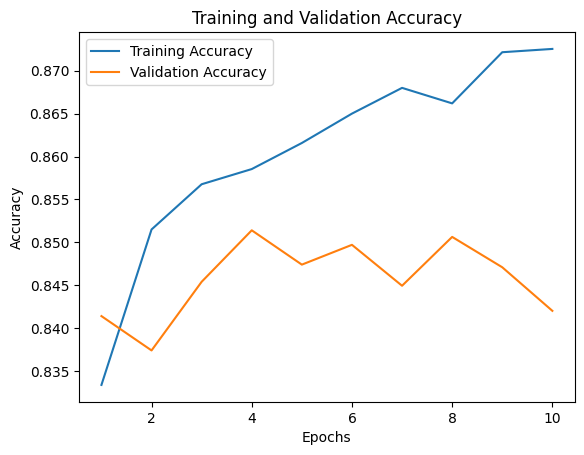

In [19]:
# Plot the accuracy
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

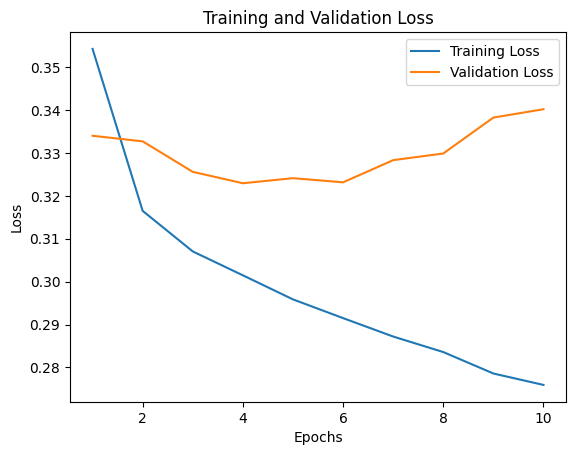

In [20]:
# Plot the loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()